# CLIENT PROJECT

**MADE BY TEAM ID: PTID-CDS-JUL22-1339**

**PROJECT ID: PRCL - 0017**

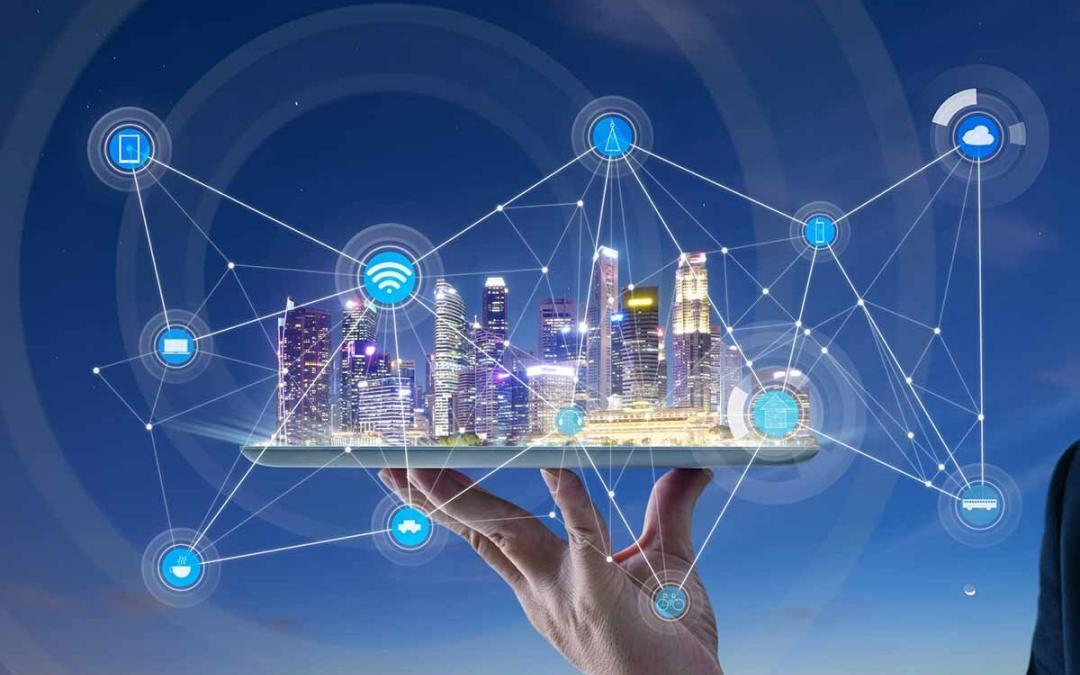

## BUSINESS CASE - 
## 1. Understanding the variables that are influencing the customers to migrate.
## 2. Creating Churn risk scores that can be indicative to drive retention campaigns.      
## 3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.


This notebook contains various ML Models which will be able to predict the posibility of receiving H1N1 and seasonal flu to peoples.

Pipline of this Model Building :-
- Problem Defination
* Importing data from SQL Database.
* Domain analysis
* Basic checks
* EDA
* DATA preprocessing
* Model selection
* Hyperparameter tuning
* Model Evaluation
* Probability column adding
* Conclusion

# 1] PROBLEM DEFINATION
- Understanding the variables that are influencing the customers to migrate.
- Creating Churn risk scores that can be indicative to drive retention campaigns.
- Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

# IMPORTING NECESSORY MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#!pip install pymysql
#!pip install mysql-connector
import os
import mysql.connector
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,f1_score

# 2] IMPORTING DATA FROM GIVEN DATABASE

In [3]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&')

In [4]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


## SELECTING DATABASE

In [5]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_telecom
0        telecom_churn_data


## READING TABLE FROM SQL DATABASE

In [7]:
query = "select * from telecom_churn_data" # SQL statement
output = pd.read_sql(query,connection)
output

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


## IMPORTING DATA IN CSV FORMAT

In [8]:
output.to_csv('Nochurn.csv')

In [2]:
data = pd.read_csv('C:/Users/MAYUR/Downloads/NO CHURN/Nochurn.csv')

In [11]:
data.head()

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data.drop(labels =['Unnamed: 0'], axis=1, inplace=True) 

In [23]:
data

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4617 non-null   int64  
 1   columns1    4617 non-null   object 
 2   columns2    4617 non-null   int64  
 3   columns3    4617 non-null   int64  
 4   columns4    4617 non-null   object 
 5   columns5    4617 non-null   object 
 6   columns6    4617 non-null   object 
 7   columns7    4617 non-null   int64  
 8   columns8    4617 non-null   float64
 9   columns9    4617 non-null   int64  
 10  columns10   4617 non-null   float64
 11  columns11   4617 non-null   float64
 12  columns12   4617 non-null   int64  
 13  columns13   4617 non-null   float64
 14  columns14   4617 non-null   float64
 15  columns15   4617 non-null   int64  
 16  columns16   4617 non-null   float64
 17  columns17   4617 non-null   float64
 18  columns18   4617 non-null   int64  
 19  columns19   4617 non-null  

In [4]:
data.rename(columns={'columns1': 'State',
                   'columns2':'Account_Length' ,
                   'columns3':'Area_Code',
                   'columns4':'Phone',
                   'columns5':'International_Plan', 
                   'columns6':'VMail_Plan',
                   'columns7':'VMail_Message',
                   'columns8':'Day_Mins',  
                   'columns9':'Day_Calls', 
                   'columns10':'Day_Charge',
                   'columns11':'Eve_Mins',
                   'columns12':'Eve_Calls',   
                   'columns13':'Eve_Charge',
                   'columns14':'Night_Mins',
                   'columns15':'Night_Calls',   
                   'columns16':'Night_Charge',
                   'columns17':'International_Mins',
                   'columns18':'International_calls',   
                   'columns19':'International_Charge',
                   'columns20':'CustServ_Calls',
                   'columns21':'Churn',  
                   }, inplace = True )

In [5]:
pd.set_option('display.max_columns',None)

In [25]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# 3] DOMAIN ANALYSIS

- **State** - 2-letter code of the US state of customer residence.
- **Account Length** - Number of months the customer has been with the current telco provider.
- **Area Code** - 3 digit area code.
- **Phone** - Phone number of customer.
- **International Plan** - The customer has international plan or not.
- **VMail Plan** - The customer has voice mail plan or not.
- **VMail Message** - Number of voice-mail messages.
- **Day Mins** - Total minutes of day calls.
- **Day Calls** - Total number of day calls.
- **Day Charge** - Total charge of day calls.
- **Eve Mins** - Total minutes of evening calls.
- **Eve Calls** - Total number of evening calls.
- **Eve Charge** - Total charge of evening calls.
- **Night Mins** - Total minutes of night calls.
- **Night Calls** - Total number of night calls.
- **Night Charge** - Total charge of night calls.
- **International Mins** - Total minutes of international calls.
- **International calls** - Total number of international calls.
- **International Charge** - Total charge of international calls.
- **CustServ Calls** - Number of calls to customer service.
- **Churn** - Customer churn or not. (target variable)

# 4] BASIC CHECKS

In [30]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [31]:
data.tail()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.80,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

**Insights**
- from above dataset, it appears that there are 21 columns and 4617 row.Also we get to know that there are 16 numerical columns and 5 object(string) columns.The dataset is having null values.

In [33]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [34]:
data.describe(include = 'O')

,State,Phone,International Plan,VMail Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


# 5]  Evaluatory Data Analysis 

we will perform three types of analysis
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

In [7]:
data.columns

Index(['Unnamed: 0', 'State', 'Account Length', 'Area Code', 'Phone',
       'International Plan', 'VMail Plan', 'VMail Message', 'Day Mins',
       'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
       'Night Mins', 'Night Calls', 'Night Charge', 'International Mins',
       'International calls', 'International Charge', 'CustServ Calls',
       'Churn'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [14]:
data.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [20]:
data.International_Plan.unique()

array([' no', ' yes'], dtype=object)

In [21]:
data.VMail_Message.unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6], dtype=int64)

In [23]:
data.CustServ_Calls.unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

# Univariate analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

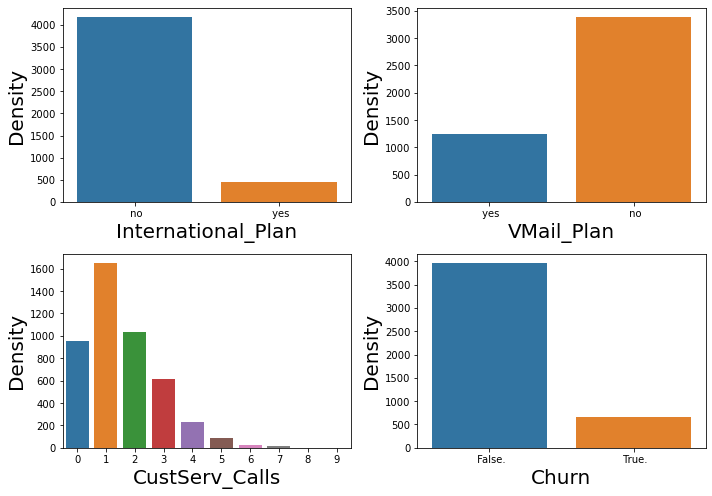

In [25]:
box=data[['International_Plan','VMail_Plan','CustServ_Calls','Churn']]
plt.figure(figsize=(10,7))
pltnum=1
for i in box:
    plt.subplot(2,2,pltnum)
    sns.countplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

**DATA INSIGHTS**
- Most customers are not taking International Plans
- Most customers are not taking Vmail plan
- Most people have one customer service call only.
- Most customer are not going to churn

<AxesSubplot:ylabel='State'>

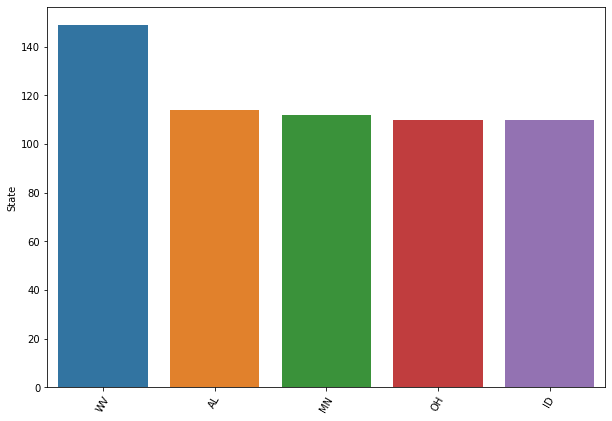

In [26]:
plt.figure(figsize=(10,7))
STATE_count = data.State.value_counts()[:5]
plt.xticks(rotation = 60)
sns.barplot(x = STATE_count.index, y = STATE_count)

**DATA INSIGHTS**

- TOP 5 CUSTOMER STATE ARE VW,AL,MN,CH AND ID
- 150 CUSTOMERS ARE FROM VW STATE

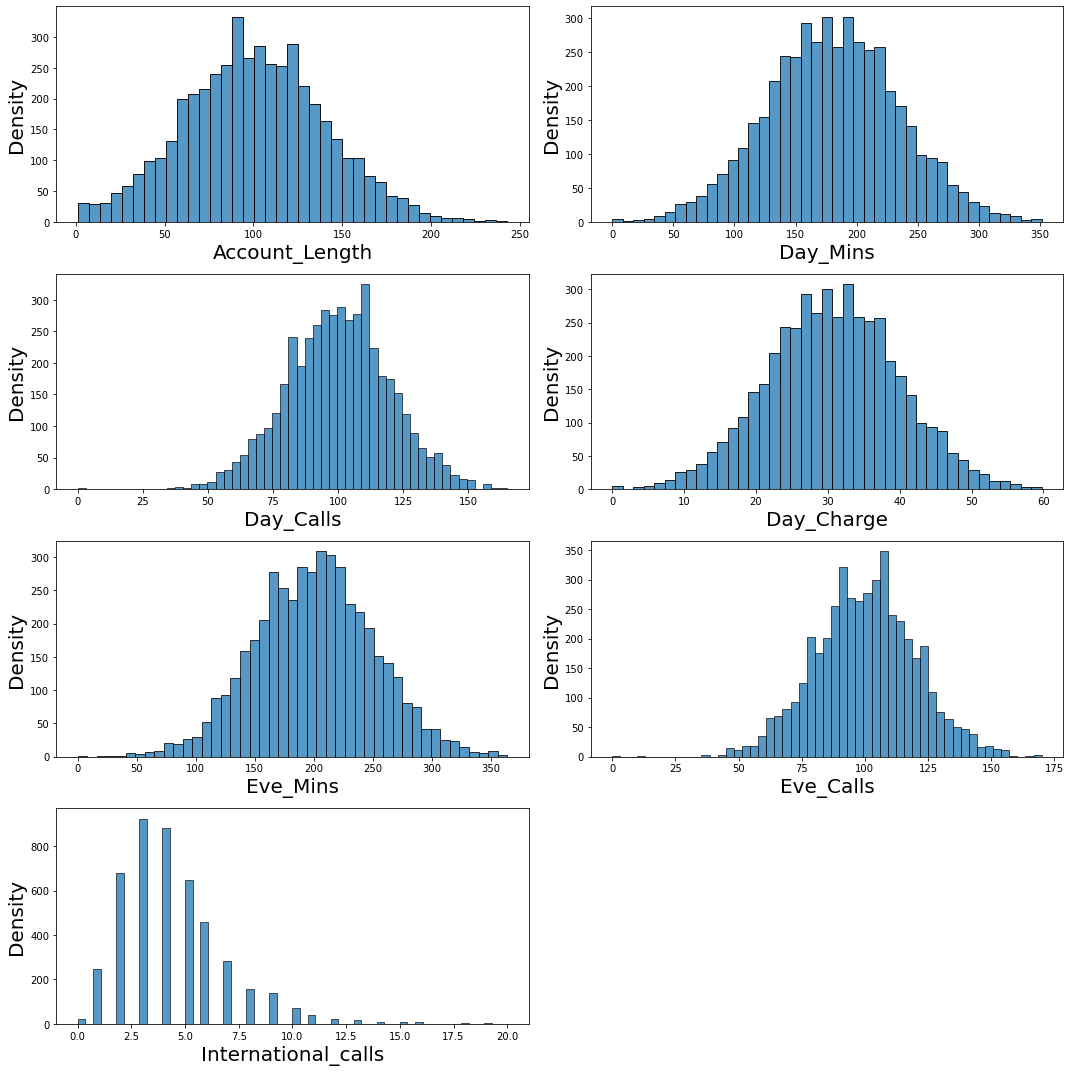

In [8]:
box=data[['Account_Length','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','International_calls']]
plt.figure(figsize=(15,15))
pltnum=1
for i in box:
    plt.subplot(4,2,pltnum)
    sns.histplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

## DATA INSIGHTS
- Most customers are with this telecom provider for 50 to 150 month
- Total number of Day call mins are in between 120 to 250 Mins.
- Total number of Day calls ranges from 75 to 125.
- Total number of Day call charges are in between 20 to 50.
- Total number of Evening mins are in between 150 to 250 mins.
- Total number of Evening calls are ranges from 75 to 125.
- Total number of International calls are 1 to 3.

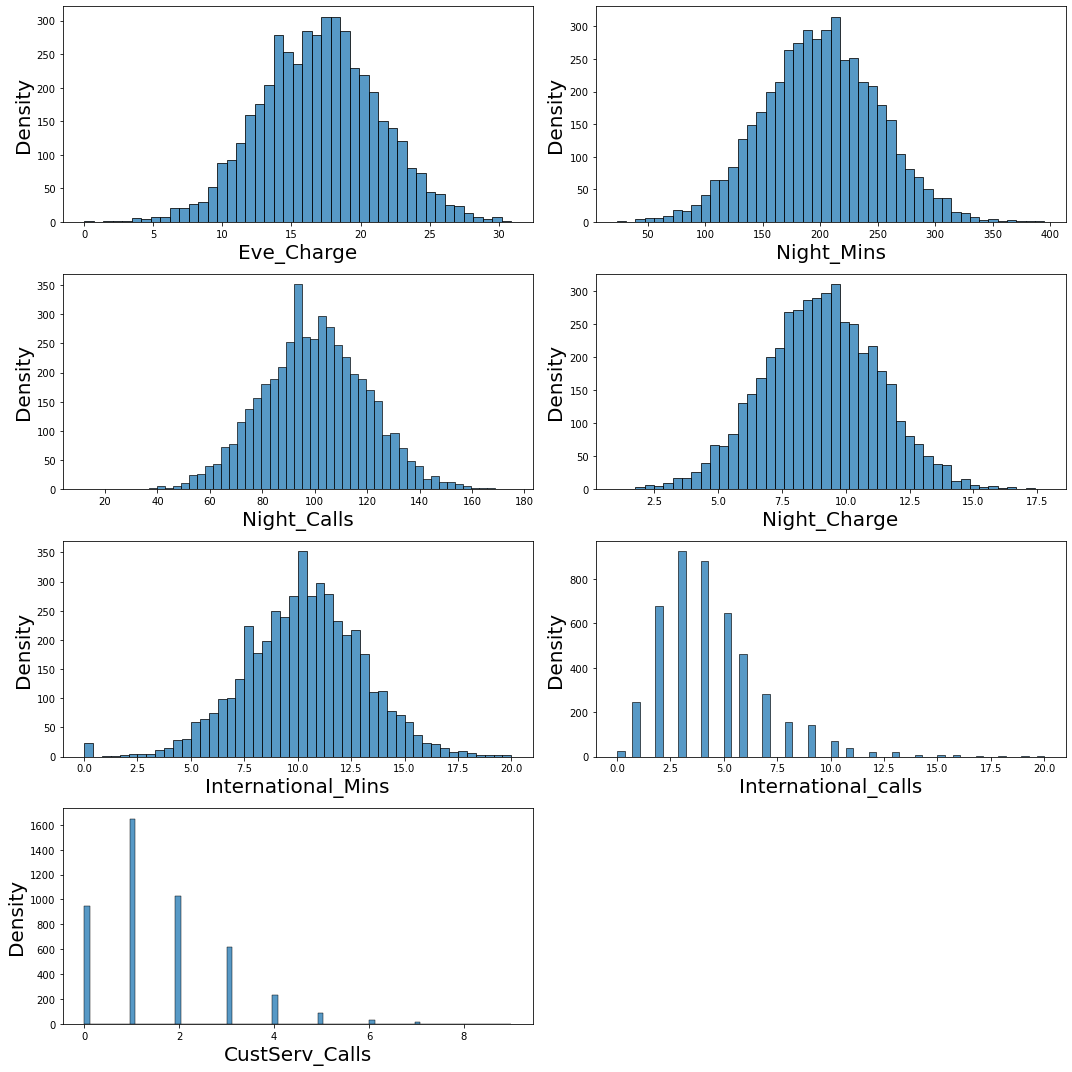

In [33]:
box=data[['Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_calls','CustServ_Calls']]
plt.figure(figsize=(15,15))
pltnum=1
for i in box:
    plt.subplot(4,2,pltnum)
    sns.histplot(box[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    pltnum+=1
plt.tight_layout()
plt.show() 

## DATA INSIGHTS
- Total number of Evening call charges are in between 12 to 25.
- Total number of night call mins ranges from 150 to 220. mins
- Total number of night calls are in between 80 to 100.
- Total number of night calls charges are in between 6 to 12.
- Total number of International call mins are ranges from 7.5 to 15.
- Total number of International calls are in between 2 to 5.
- There is atleast one service call to customer.

# Bivariate Analysis

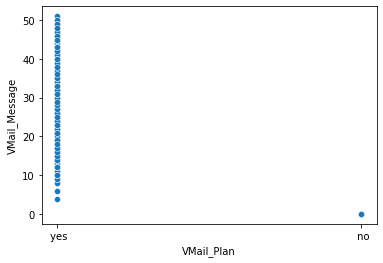

In [24]:
sns.scatterplot(x='VMail_Plan',y='VMail_Message',data=data)
plt.show()  

## Data Insights
- **Does people taking VMail plans for VMail messages ?** Customers have done VMail messages only if they have VMail Plan

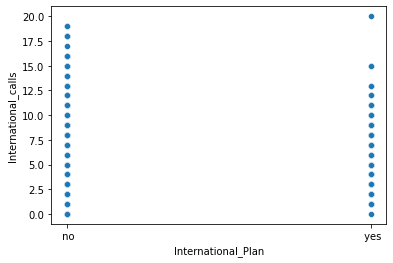

In [23]:
sns.scatterplot(x='International_Plan',y='International_calls',data=data)
plt.show()  

## Data Insights
- **Does people taking International plans for International calls ?** Customers have done International calls even after they don't have the International Plans.

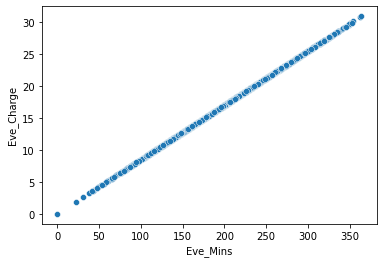

In [26]:
sns.scatterplot(x='Eve_Mins',y='Eve_Charge',data=data)
plt.show() 

## Data Insights
- **What is the relation of Evening calling minutes and Evening calling charges ?**Evening charges are directly proportional to total number of evening call minutes.

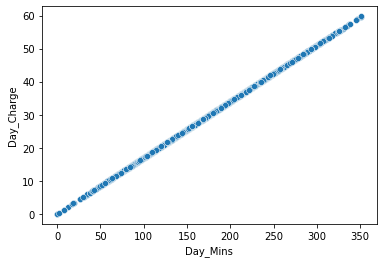

In [27]:
sns.scatterplot(x='Day_Mins',y='Day_Charge',data=data) 
plt.show()

## Data Insights
- **What is the relation of Day calling minutes and Day calling charges ?** Day charges are directly proportional to total number of daily minutes.

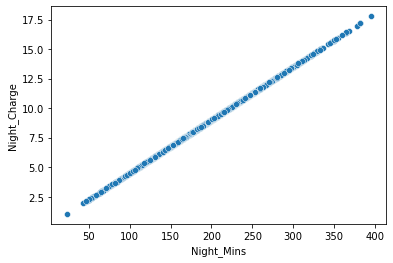

In [43]:
sns.scatterplot(x='Night_Mins',y='Night_Charge',data=data)
plt.show()

## Data Insights
- **What is the relation of Night calling minutes and Night calling charges ?** Night charges are directly proportional to total number of night call minutes.

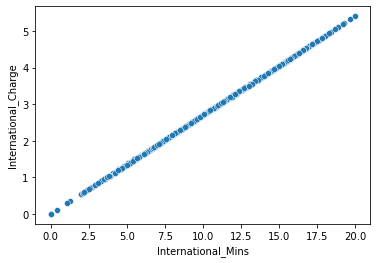

In [41]:
sns.scatterplot(x='International_Mins',y='International_Charge',data=data)
plt.show()

## Data Insights
- **What is the relation of International calling minutes and International calling charges ?**International charges are directly proportional to total number of International call minutes.

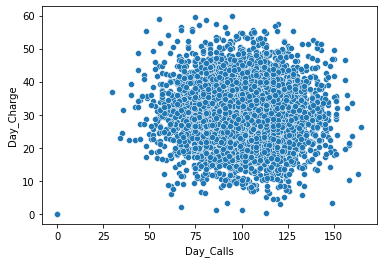

In [29]:
sns.scatterplot(x='Day_Calls',y='Day_Charge',data=data)
plt.show()

## Data Insights
- **Does day calling charges effects number of day calls count ?**As day charge increases the number of day calls decreases.

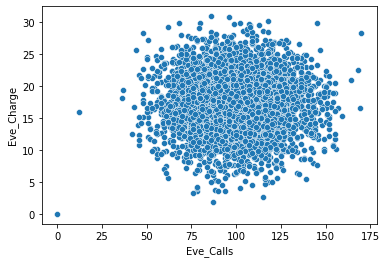

In [30]:
sns.scatterplot(x='Eve_Calls',y='Eve_Charge',data=data)
plt.show()

## Data Insights
- **Does Evening calling charges effects number of evening calls count ?**As evening charge increases the number of evening calls decreases.

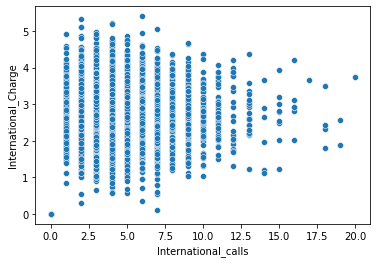

In [37]:
sns.scatterplot(x='International_calls',y='International_Charge',data=data)
plt.show()  

## Data Insights
- **Does International calling charges effects number of international calls count ?** As International charge increases the number of International calls decreases.

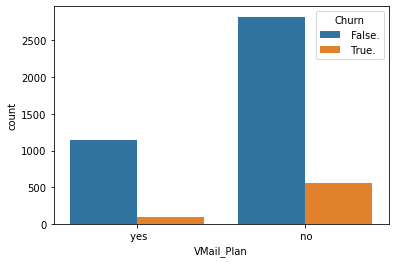

In [55]:
sns.countplot(x='VMail_Plan',hue='Churn',data=data)
plt.show()  

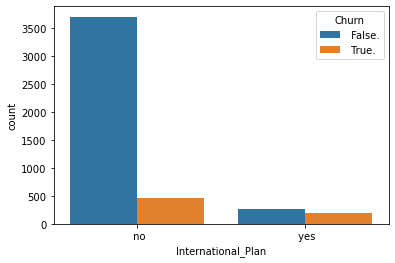

In [57]:
sns.countplot(x='International_Plan',hue='Churn',data=data)
plt.show()  

# Data Insights
- **What are the chance of Customers having International plan on Churn state ?** Customers having International Plan have 40% chance of going to Churn 

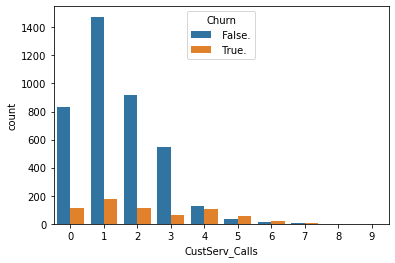

In [62]:
sns.countplot(x='CustServ_Calls',hue='Churn',data=data)
plt.show()  

# Data Insights
- **Does Customers calls to customer services before taking Churn decision ?** Customers having more than 4 Customer Service calls are going to Churn.

# Multivariate analysis

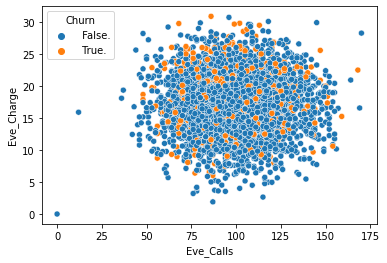

In [69]:
sns.scatterplot(x='Eve_Calls',y='Eve_Charge',hue='Churn',data=data)
plt.show()

# Data Insights
- **Does Evening calling charges going to effect Customers mindset to Churn ?**Customers having facing higher Evening charges are going to Churn.

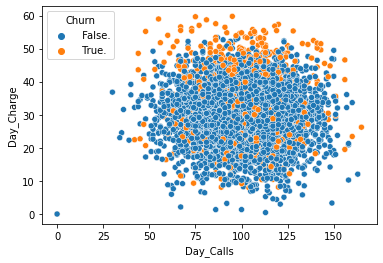

In [71]:
sns.scatterplot(x='Day_Calls',y='Day_Charge',hue='Churn',data=data)
plt.show()

# Data Insights
- **Does Day calling charges going to effect Customers mindset to Churn ?** Customers having facing higher Day charges are going to Churn.

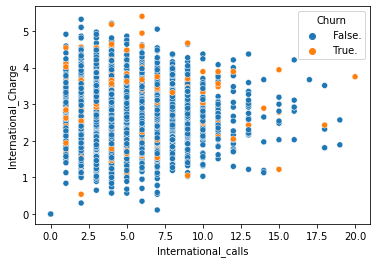

In [73]:
sns.scatterplot(x='International_calls',y='International_Charge',hue='Churn' ,data=data)
plt.show()  

# Data Insights
- **What is effect of International calling charges on Chrun column ?** Customers facing higher International charges have more chance to Churn.

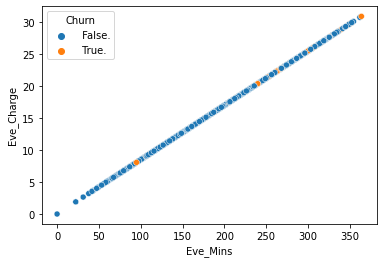

In [74]:
sns.scatterplot(x='Eve_Mins',y='Eve_Charge',hue='Churn' ,data=data)
plt.show() 

# Data Insights
- **What is effect of Evening calling minutes on Chrun column ?** Customers having higher Evening calling minutes and feel that charges are increasing tremendously are going to Churn

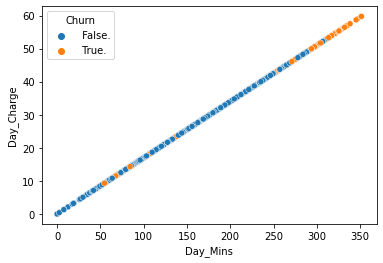

In [75]:
sns.scatterplot(x='Day_Mins',y='Day_Charge',hue='Churn',data=data) 
plt.show()

# Data Insights
- **What is effect of DAay calling minutes on Chrun column ?** Customers having higher Day calling minutes and feel that charges are increasing tremendously are going to Churn

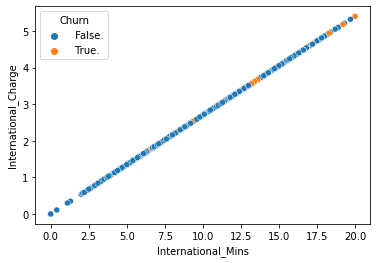

In [77]:
sns.scatterplot(x='International_Mins',y='International_Charge',hue='Churn',data=data)
plt.show()

# Data Insights
- **What is effect of International calling minutes on Chrun column ?** Customers having higher International calling minutes and feel that charges are increasing tremendously are going to Churn

# 6] Data Pre-processing

## Checking for null values

In [79]:
data.isnull().sum()*100/len(data)

State                   0.0
Account_Length          0.0
Area_Code               0.0
Phone                   0.0
International_Plan      0.0
VMail_Plan              0.0
VMail_Message           0.0
Day_Mins                0.0
Day_Calls               0.0
Day_Charge              0.0
Eve_Mins                0.0
Eve_Calls               0.0
Eve_Charge              0.0
Night_Mins              0.0
Night_Calls             0.0
Night_Charge            0.0
International_Mins      0.0
International_calls     0.0
International_Charge    0.0
CustServ_Calls          0.0
Churn                   0.0
dtype: float64

## There is no Null value present in dataset.

In [80]:
data

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [81]:
data.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [6]:
data.drop(labels =['Phone'], axis=1, inplace=True) 

In [7]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.State=lc.fit_transform(data.State)
data.International_Plan=lc.fit_transform(data.International_Plan)
data.VMail_Plan=lc.fit_transform(data.VMail_Plan)
data.Churn=lc.fit_transform(data.Churn)

In [84]:
data

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,32,177,408,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,46,67,408,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,22,98,415,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


# 7] Feature selection

# Heatmap correlation

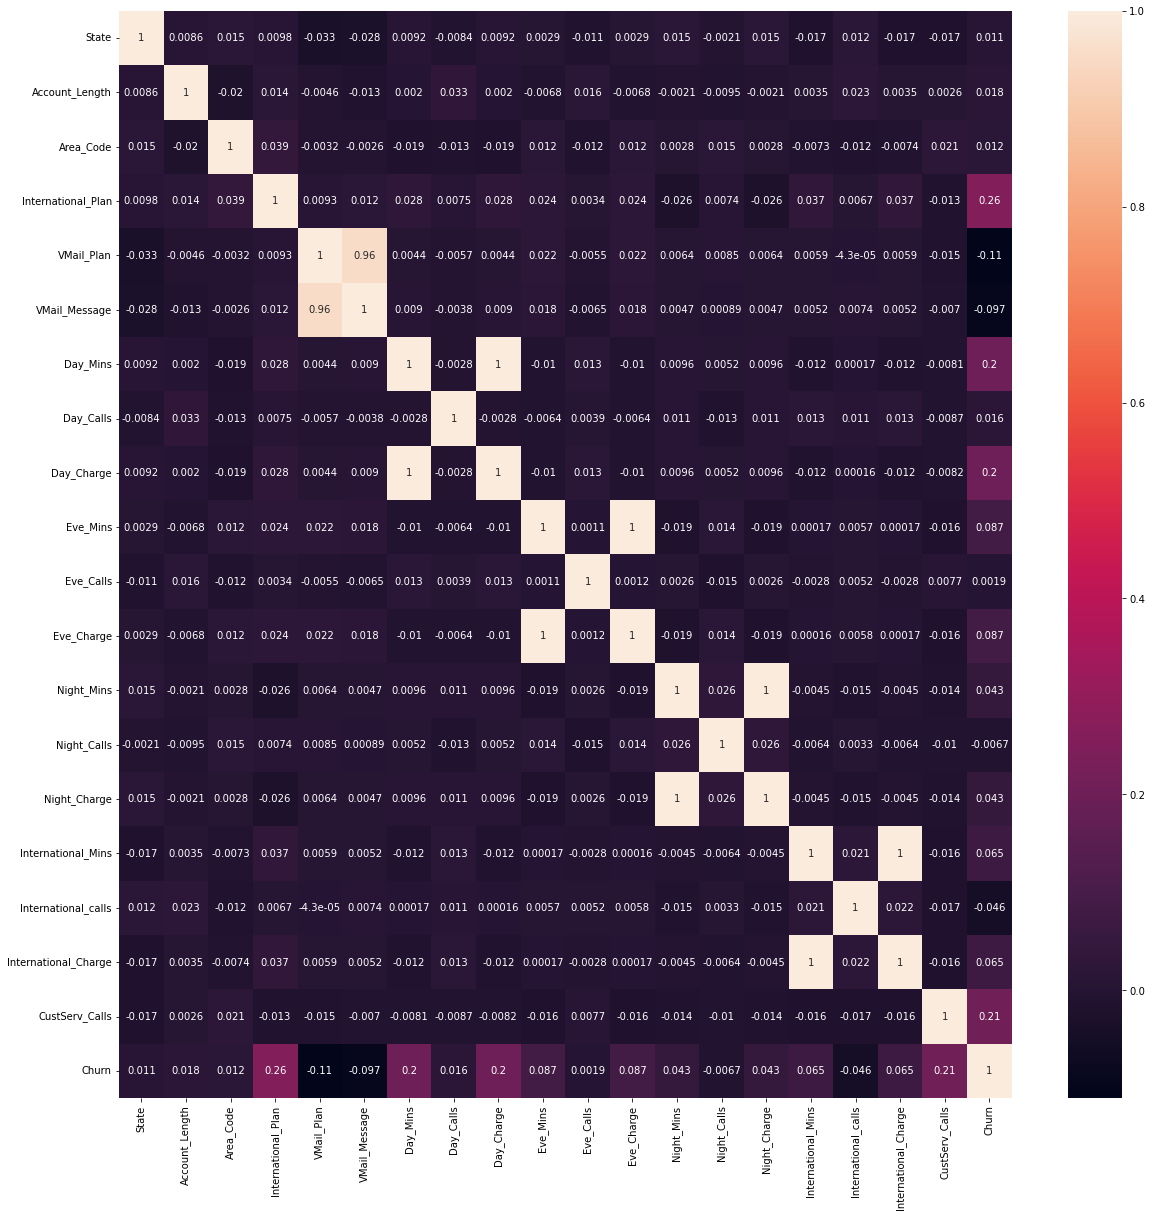

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

## NOTE
- As the VMail_message & VMail_Plan having correlation, we are dropping VMail_message column.
- As the Day_charge & Day_Mins having correlation, we are dropping Day_Mins column.
- As the Eve_charge & Eve_Mins having correlation, we are dropping Eve_Mins column.
- As the Night_charge & Night_Mins having correlation, we are dropping Night_Mins column.
- As the International_charge & International_Mins having correlation, we are dropping International_Mins column.

# 8] Model creation

In [88]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [34]:
# Creating X and y variable
X = data.drop(columns = ['State', 'Account_Length', 'Area_Code','VMail_Message','Day_Mins', 'Eve_Mins', 'Night_Mins','International_Mins','Churn'])
y = data['Churn']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split( X, y, test_size= 0.2)

# 9] Model Selection

# Let us compare the Different Machine Learning Models

## Random forest :

In [117]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

In [118]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       793
           1       0.97      0.76      0.85       131

    accuracy                           0.96       924
   macro avg       0.97      0.88      0.92       924
weighted avg       0.96      0.96      0.96       924



## Logistic Regression :

In [119]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

In [120]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       793
           1       0.59      0.15      0.24       131

    accuracy                           0.86       924
   macro avg       0.73      0.57      0.58       924
weighted avg       0.83      0.86      0.83       924



## K Nearest Neighbor :

In [121]:
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [122]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       793
           1       0.38      0.07      0.12       131

    accuracy                           0.85       924
   macro avg       0.62      0.52      0.52       924
weighted avg       0.80      0.85      0.81       924



## Gaussian Naive Bayes :

In [123]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

In [124]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       793
           1       0.51      0.43      0.47       131

    accuracy                           0.86       924
   macro avg       0.71      0.68      0.69       924
weighted avg       0.85      0.86      0.86       924



## Support Vector Machine :

In [125]:
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test) 
acc_svc = round(svclassifier.score(X_test, Y_test) * 100, 2)

In [126]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       793
           1       0.00      0.00      0.00       131

    accuracy                           0.86       924
   macro avg       0.43      0.50      0.46       924
weighted avg       0.74      0.86      0.79       924



## Decision Tree :

In [127]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

In [128]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       793
           1       0.71      0.80      0.76       131

    accuracy                           0.93       924
   macro avg       0.84      0.87      0.86       924
weighted avg       0.93      0.93      0.93       924



# Gradient Boosting

In [129]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm_h1n1=GradientBoostingClassifier() ## object creation
gbm_h1n1.fit(X_train, Y_train) ## fitting the data
y_gbm=gbm_h1n1.predict(X_test)#predicting the price
acc_gbm_h1n1 = round(gbm_h1n1.score(X_test, Y_test) * 100, 2)

In [130]:
print(classification_report(Y_test, y_gbm))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       793
           1       0.93      0.79      0.85       131

    accuracy                           0.96       924
   macro avg       0.95      0.89      0.91       924
weighted avg       0.96      0.96      0.96       924



# XGBoost 

In [131]:
from xgboost import XGBClassifier#importing the model library
xgb_r_h1n1=XGBClassifier() ## object creation
xgb_r_h1n1.fit(X_train, Y_train)# fitting the data
y_hat=xgb_r_h1n1.predict(X_test)#predicting the price
acc_xgb_r_h1n1 = round(xgb_r_h1n1.score(X_test, Y_test) * 100, 2)

In [132]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       793
           1       0.96      0.80      0.87       131

    accuracy                           0.97       924
   macro avg       0.97      0.90      0.93       924
weighted avg       0.97      0.97      0.97       924



## ALL SCORES

In [133]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree','Gradient Boosting','Xgb boost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
             acc_decision_tree,acc_gbm_h1n1,acc_xgb_r_h1n1]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.75,Xgb boost
96.32,Random Forest
96.10,Gradient Boosting
92.64,Decision Tree
86.47,Logistic Regression
86.15,Naive Bayes
85.82,Support Vector Machines
85.17,KNN


- **H0 - Customer is going to Churn**
- **H1 - Customer is not to going to Churn**

- FP - predicted customer is going to churn but didnt churn
- FN - predicted customer is not going to churn but churns

**FN has more impact so Recall score is important**

<AxesSubplot:xlabel='Churn', ylabel='count'>

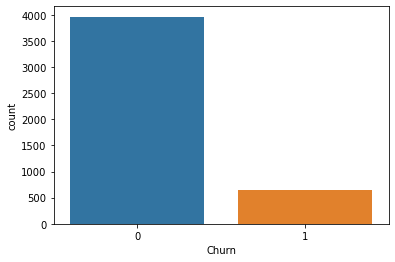

In [134]:
sns.countplot(data['Churn'])

# 10] Hyperparameter Tuning & Model Evaluation

# Implementation using LOGISTIC REGRESSION

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_train = logreg.predict(X_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

In [11]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       794
           1       0.53      0.15      0.23       130

    accuracy                           0.86       924
   macro avg       0.70      0.56      0.58       924
weighted avg       0.83      0.86      0.83       924



In [138]:
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3168
           1       0.53      0.15      0.23       525

    accuracy                           0.86      3693
   macro avg       0.70      0.56      0.58      3693
weighted avg       0.82      0.86      0.82      3693



In [139]:
pd.crosstab(Y_test, Y_pred) # confusion matrix 

col_0,0,1
Churn,,
0,779,14
1,111,20


# Hyper Parameter Tuning the Logistic Regression model

In [39]:
from sklearn.model_selection import RandomizedSearchCV

penalty=['none']
C=[1.0]
solver=['saga']
max_iter = [100]

#dictionary for hyperparameters
#random_grid = {'penalty': 'l1','C':C,
          #     'solver': solver, 'max_iter': max_iter}
random_grid = {'penalty': penalty,'C':C,
             'solver': solver, 'max_iter': max_iter}
logreg1 = LogisticRegression()#model

logreg_cv = RandomizedSearchCV(estimator=logreg1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
logreg_cv.fit(X_train, Y_train)##training data on randomsearch cv
logreg_best_params = logreg_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {logreg_best_params})")##printing  best parameters

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best paramters: {'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'C': 1.0})


In [40]:
logreg2 = LogisticRegression(solver = 'saga',penalty='none',max_iter = 100,C=1.0)#passing best parameter to randomforest
logreg2.fit(X_train,Y_train)#training 
y_predict=logreg2.predict(X_test)#testing

In [41]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       793
           1       0.50      0.03      0.06       131

    accuracy                           0.86       924
   macro avg       0.68      0.51      0.49       924
weighted avg       0.81      0.86      0.80       924



In [42]:
pd.crosstab(Y_test,y_predict) # confusion matrix 

col_0,0,1
Churn,,
0,789,4
1,127,4


# Implementing with DECISION TREE

In [12]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier() #object creation for decision tree  
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [13]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 
y_train_predict

array([0, 1, 0, ..., 0, 0, 0])

In [14]:
y_test_pred=dt.predict(X_test) #prediction
y_test_pred #predicted values for testing

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(Y_train,y_train_predict)#checking accuracy
print(acc_train*100,'%')

100.0 %


In [15]:
print(classification_report(Y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3167
           1       1.00      1.00      1.00       526

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



In [27]:
pd.crosstab(Y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
Churn,,
0,3168,0
1,0,525


In [28]:
test_acc=accuracy_score(Y_test,y_test_pred)#testing accuracy 
print(test_acc*100,'%')

91.45021645021644 %


In [29]:
## test score
test_f1=f1_score(Y_test,y_test_pred)#f1 score
print(test_f1*100,'%')

69.4980694980695 %


In [16]:
print(classification_report(Y_test,y_test_pred))# for  testing 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       794
           1       0.75      0.74      0.74       130

    accuracy                           0.93       924
   macro avg       0.85      0.85      0.85       924
weighted avg       0.93      0.93      0.93       924



In [17]:
pd.crosstab(Y_test,y_test_pred)# confusion matrix for

col_0,0,1
Churn,,
0,762,32
1,34,96


# Hyper Pararmeter Tuning the Decision Tree model

In [44]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"),  # searches the features for a split
    "max_depth":(list(range(1, 20))),  #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],     #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)), #minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

tree_clf = DecisionTreeClassifier(random_state=3)  #object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods
tree_cv.fit(X_train,Y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'})


In [18]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf= 13,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [19]:
dt1.fit(X_train,Y_train)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=13)

In [20]:
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [21]:
print(classification_report(Y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       794
           1       0.83      0.72      0.77       130

    accuracy                           0.94       924
   macro avg       0.89      0.85      0.87       924
weighted avg       0.94      0.94      0.94       924



In [22]:
pd.crosstab(Y_test,y_hat1)# confusion matrix for

col_0,0,1
Churn,,
0,775,19
1,37,93


# Implementing with Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,Y_train)#training the data

RandomForestClassifier()

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RandomForestClassifier()

RandomForestClassifier()

In [39]:
y_predict=rf_clf.predict(X_test)#testing

In [40]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       782
           1       0.94      0.71      0.81       142

    accuracy                           0.95       924
   macro avg       0.95      0.85      0.89       924
weighted avg       0.95      0.95      0.95       924



In [41]:
pd.crosstab(Y_test,y_predict)# confusion matrix for

col_0,0,1
Churn,,
0,776,6
1,41,101


# Hyperparameter Tuning Random Forest Model

In [42]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, Y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True})


In [44]:
rf_clf2 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto', max_depth= 90, bootstrap= True)#passing best parameter to randomforest
rf_clf2.fit(X_train, Y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing
f1_score=f1_score(Y_test,y_predict)#checking performance

In [45]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       782
           1       0.96      0.70      0.81       142

    accuracy                           0.95       924
   macro avg       0.96      0.85      0.89       924
weighted avg       0.95      0.95      0.95       924



# IMPLEMENTING WITH GRADIENT BOOSTING 

In [54]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train, Y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

In [47]:
print(classification_report(Y_test, y_gbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       782
           1       0.95      0.75      0.84       142

    accuracy                           0.96       924
   macro avg       0.96      0.87      0.91       924
weighted avg       0.96      0.96      0.95       924



In [48]:
pd.crosstab(Y_test, y_gbm) # confusion matrix 

col_0,0,1
Churn,,
0,777,5
1,36,106


# Hyperparameter Tuning Gradient Boosting Model

In [50]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150]}

GB=GradientBoostingClassifier()
rcv= RandomizedSearchCV(estimator=GB, scoring='f1',param_distributions=param_grid, n_iter=10, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, Y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.2})


In [51]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(n_estimators=80, max_depth= 5, learning_rate= 0.2) ## object creation
gbm.fit(X_train, Y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

In [55]:
print(classification_report(Y_test, y_gbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       782
           1       0.95      0.75      0.84       142

    accuracy                           0.96       924
   macro avg       0.96      0.87      0.91       924
weighted avg       0.96      0.96      0.95       924



In [56]:
pd.crosstab(Y_test, y_gbm) # confusion matrix 

col_0,0,1
Churn,,
0,777,5
1,36,106


# Finalising the XGBoost model as it gives higher recall score than other models.

# 11] Creating Churn risk scores that can be indicative to drive retention campaigns.


In [59]:
gbm.predict_proba(X)

array([[0.96256245, 0.03743755],
       [0.98080234, 0.01919766],
       [0.97819995, 0.02180005],
       ...,
       [0.96627051, 0.03372949],
       [0.9716665 , 0.0283335 ],
       [0.97824864, 0.02175136]])

In [85]:
migrate = gbm.predict(X)

In [98]:
data['Churn-Flag']= migrate

In [108]:
data.loc[data['Churn-Flag']==0 , 'Churn-Flag'] = 'NO'
data.loc[data['Churn-Flag']==1, 'Churn-Flag'] = 'YES'

In [64]:
chrun = gbm.predict_proba(X)

In [61]:
chrun[:,0]

array([0.96256245, 0.98080234, 0.97819995, ..., 0.96627051, 0.9716665 ,
       0.97824864])

In [65]:
chrun[:,1]

array([0.03743755, 0.01919766, 0.02180005, ..., 0.03372949, 0.0283335 ,
       0.02175136])

In [82]:
data['Churn_score']= chrun[:,1]*100

In [83]:
data['No Churn_score']= chrun[:,0]*100

In [109]:
data.drop(labels=['Churn'],axis=1,inplace=True)

In [110]:
data

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn_score,No Churn_score,Churn-Flag
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,3.743755,96.256245,NO
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1.919766,98.080234,NO
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,2.180005,97.819995,NO
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,7.932143,92.067857,NO
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,7.246992,92.753008,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,1.767137,98.232863,NO
4613,32,177,408,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,5.998958,94.001042,NO
4614,46,67,408,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,3.372949,96.627051,NO
4615,22,98,415,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,2.833350,97.166650,NO


# Lets filter out Customers which have higher risk score to churn

In [111]:
data.loc[data['Churn_score']>50]

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn_score,No Churn_score,Churn-Flag
10,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,60.287855,39.712145,YES
14,12,62,415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,60.605867,39.394133,YES
15,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,99.733145,0.266855,YES
21,5,77,408,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,93.537893,6.462107,YES
33,3,12,408,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,81.443653,18.556347,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,20,80,510,1,0,0,275.4,89,46.82,186.7,66,15.87,201.3,87,9.06,9.4,2,2.54,0,97.891165,2.108835,YES
4577,16,158,415,1,0,0,200.0,98,34.00,205.4,106,17.46,323.7,96,14.57,8.9,2,2.40,0,91.329557,8.670443,YES
4592,41,72,415,0,1,38,84.3,116,14.33,267.2,127,22.71,167.7,75,7.55,8.3,6,2.24,4,77.062809,22.937191,YES
4597,37,65,408,1,0,0,54.8,74,9.32,239.8,93,20.38,214.4,91,9.65,13.4,5,3.62,1,91.149998,8.850002,YES


# 12] Conclusion

## 1. Variables influencing the customers to migrate
### I. Customers having international plan have 40 % chance to churn.
### II. Customers calling customer care more than 4 are having higher chances to churn
### III. Customers facing higher evening, day and international charges having higher chances to churn
### IV. Customers having high evening, day and international calling minutes and feel that charges are increasing tremendously are going to Churn.

## 2. Churn risk scores created that can be indicative to drive retention campaigns. Customers having Churn probability more than 50 % need attention from retention campaigns.


## 3. Created a new variable Churn-Flag, with the help of this variable, email campaigns with lucrative offers can be targeted to Churn YES customers.
